In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
b = pd.read_csv("S2_new.csv")
a = pd.read_csv("S1_new.csv")
c = pd.read_csv("S3_new.csv")

In [2]:
df = pd.read_excel("Footfall_DLR_Daily.xlsx")
#df.replace(0,np.nan,inplace=True)
box = df.keys()
for i in box:

    y =+ len(df[pd.isnull(df[i])])
    
#df["Pedestrian"].replace(0,np.nan,inplace=True)
df.loc[df["Pedestrian"]==0]

UTC Datetime      Local Datetime  countlineId  \
3570    2021-12-01 2021-12-01 00:00:00        22995   
3571    2021-12-01 2021-12-01 00:00:00        22995   
3572    2021-12-01 2021-12-01 00:00:00        22994   
3573    2021-12-01 2021-12-01 00:00:00        22994   
3574    2021-12-01 2021-12-01 00:00:00        22996   
...            ...                 ...          ...   
14155   2022-07-12 2022-07-12 01:00:00        22995   
14156   2022-07-12 2022-07-12 01:00:00        22994   
14157   2022-07-12 2022-07-12 01:00:00        22994   
14158   2022-07-12 2022-07-12 01:00:00        22996   
14159   2022-07-12 2022-07-12 01:00:00        22996   

                            countlineName Sensor Number direction  Pedestrian  
3570           S2_StGeorgesUpperSt_dlr001            S2        in           0  
3571           S2_StGeorgesUpperSt_dlr001            S2       out           0  
3572   S2_StGeorgesUpperSt_pathLHS_dlr001            S2        in           0  
3573   S2_StGeorgesUpperSt_pathLHS_dlr001            S2       out           0  
3574   S2_StGeorgesUpperSt_pathRHS_dlr001            S2        in           0  
...                                   ...           ...       ...         ...  
14155          S2_StGeorgesUpperSt_dlr001            S2       out           0  
14156  S2_StGeorgesUpperSt_pathLHS_dlr001            S2        in           0  
14157  S2_StGeorgesUpperSt_pathLHS_dlr001            S2       out           0  
14158  S2_StGeorgesUpperSt_pathRHS_dlr001            S2        in           0  
14159  S2_StGeorgesUpperSt_pathRHS_dlr001            S2       out           0  

[1783 rows x 7 columns]

In [3]:
train = {"S1":a.loc[pd.to_datetime(a["UTC Datetime"])<pd.to_datetime("2021-11-1")]["Pedestrian"],
         "S3":c.loc[pd.to_datetime(c["UTC Datetime"])<pd.to_datetime("2021-11-1")]["Pedestrian"]}
train = pd.DataFrame(train)
constant = sm.add_constant(train)
model = sm.OLS(list(b.loc[pd.to_datetime(b["UTC Datetime"])<pd.to_datetime("2021-11-1")]["Pedestrian"]),constant)
result = model.fit()
test = {"S1":a.loc[pd.to_datetime(a["UTC Datetime"])>=pd.to_datetime("2021-11-1")]["Pedestrian"],
         "S3":c.loc[pd.to_datetime(c["UTC Datetime"])>=pd.to_datetime("2021-11-1")]["Pedestrian"]}
test = pd.DataFrame(test)
new_constant=sm.add_constant(train)
pred = result.predict(new_constant)


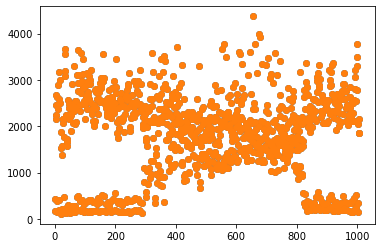

In [4]:
#plt.scatter(np.arange(len(a)),pred)
#plt.scatter(np.arange(len(b)),b["Pedestrian"])
plt.scatter(np.arange(len(pred)),pred)
plt.scatter(np.arange(len(pred)),list(b.loc[pd.to_datetime(b["UTC Datetime"])<pd.to_datetime("2021-11-1")]["Pedestrian"]))

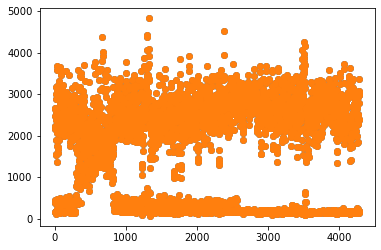

In [5]:
train = {"S1":a.loc[b["Pedestrian"]!=0]["Pedestrian"],
         "S3":c.loc[b["Pedestrian"]!=0]["Pedestrian"]}
train = pd.DataFrame(train)
train1 = {"S1":a["Pedestrian"],
         "S3":c["Pedestrian"]}
train1 = pd.DataFrame(train1)
constant = sm.add_constant(train)
model = sm.OLS(list(b.loc[b["Pedestrian"]!=0]["Pedestrian"]),constant)
result = model.fit()
test = {"S1":a.loc[pd.to_datetime(a["UTC Datetime"])>=pd.to_datetime("2021-11-1")]["Pedestrian"],
         "S3":c.loc[pd.to_datetime(c["UTC Datetime"])>=pd.to_datetime("2021-11-1")]["Pedestrian"]}
test = pd.DataFrame(test)
new_constant=sm.add_constant(train1)
pred = result.predict(new_constant)
plt.scatter(np.arange(len(pred)),b["Pedestrian"])
plt.scatter(np.arange(len(pred)),pred)

In [75]:
w = [1,2,3]
po = pd.DataFrame({"a":[183,1580,62,64,1417,2144,105,2250]})
qqq = "col1"
def highlight(s):
    if s["Pedestrian"] in list(a["Pedestrian"][a["Pedestrian"].duplicated()]):
        return ['background-color: yellow'] * len(s)
    else:
        return ['background-color: white'] * len(s)
a.style.apply(highlight, axis=1)

In [57]:
po["a"][po["a"].duplicated()]

1    1
Name: a, dtype: int64

In [6]:
q = pd.read_csv("Footfall_sensor.csv")

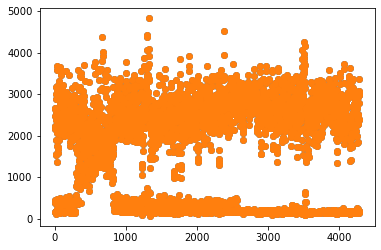

In [7]:
train = {"S1":q["Sensor1"],
         "S3":q["Sensor3"]}
train = pd.DataFrame(train)
constant = sm.add_constant(train)
model = sm.OLS(list(q["Sensor2"]),constant)
result = model.fit()
test = {"S1":a.loc[pd.to_datetime(a["UTC Datetime"])>=pd.to_datetime("2021-11-1")]["Pedestrian"],
         "S3":c.loc[pd.to_datetime(c["UTC Datetime"])>=pd.to_datetime("2021-11-1")]["Pedestrian"]}
test = pd.DataFrame(test)
new_constant=sm.add_constant(train)
pred = result.predict(new_constant)
plt.scatter(np.arange(len(pred)),q["Sensor2"])
plt.scatter(np.arange(len(pred)),pred)

In [8]:
cv = pd.read_csv("Sensor2-Copy1.csv")
cv = cv.drop(columns=["Unnamed: 0"])
cv  = pd.DataFrame.drop_duplicates(cv)
aaa = {"S1":list(a["Pedestrian"]),
      "S2":list(cv["Pedestrian"]),
      "S3":list(c["Pedestrian"])}
aaa = pd.DataFrame(aaa)
aaa.to_csv("Sensor_with_original.csv")
len(cv)

4284

In [9]:
def OLS(df,S1):
    train=df.drop([S1],axis=1)
    train1 = train.loc[df[S1]!=0]
    test = df.loc[df[S1]!=0]
    constant = sm.add_constant(train1)
    model = sm.OLS(list(test[S1]),constant)
    result = model.fit()
    new_constant=sm.add_constant(train)
    pred = result.predict(new_constant)
    return pred
w = OLS(aaa,"S2")

<AxesSubplot:>

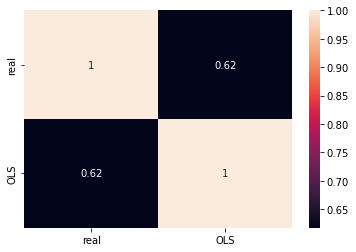

In [10]:
#plt.scatter(np.arange(len(w)),w)
import seaborn as sns
plt.scatter(np.arange(len(w)),aaa["S2"])
plt.scatter(np.arange(len(w)),w)
P={"real":aaa["S2"],
  "OLS":w}
P= pd.DataFrame(P)
sns.heatmap(P.corr(), annot = True)

/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'a')

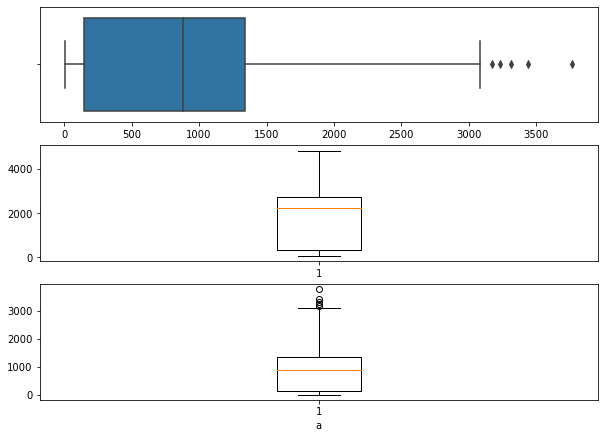

In [11]:
import seaborn as sns
fig = plt.figure(figsize=(10,20))
plt.subplot(8,1,1)
sns.boxplot(c["Pedestrian"])
plt.xlabel("a")
plt.subplot(8,1,2)
plt.boxplot(b["Pedestrian"])
a.keys()[1]
plt.subplot(8,1,3)
plt.boxplot(c["Pedestrian"])
plt.xlabel("a")
#plt.subplot(4,1,4)
#plt.boxplot(c["Pedestrian"])
#a.keys()[1]

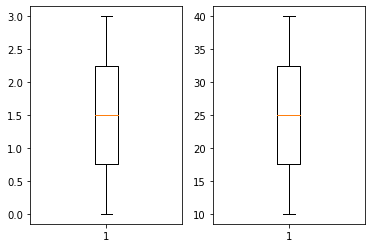

In [13]:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(1, 2, 1)
plt.boxplot(x)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(1, 2, 2)
plt.boxplot(y)

plt.show()

In [14]:
df.dtypes

Unnamed: 0         int64
UTC Datetime      object
Local Datetime    object
countlineId        int64
countlineName     object
Sensor Number     object
direction         object
Pedestrian         int64
dtype: object

In [15]:
b=df.select_dtypes(include=['int',"float"])
a = ["Unnamed: 0"]
a == b.keys().any()

False

In [16]:
aa = {"a":[0.1,0.0,1.1]}
aa = pd.DataFrame(aa)
aa.replace(0,np.nan,inplace = True)
aa.dtypes

a    float64
dtype: object

In [17]:
a={}
aa = pd.DataFrame(a)
if aa is None:
    print("ww")

In [59]:
import pandas as pd
import pandera as pa
from pandera.typing import DataFrame, Series
import numpy as np


class Schema(pa.DataFrameModel):
    #item: Series[str] = pa.Field(isin=["apple", "orange"], coerce=True)
    Pedestrian: Series[float] = pa.Field(gt=10,coerce=True)

In [60]:

@pa.check_types(lazy=True)
def transform_data(data: DataFrame[Schema]):
    ...
#valid_data = pd.DataFrame.from_records([
#    {"item": "apple", "price": 0.5},
#    {"item": "orange", "price": 0.75}
#])
#transform_data(valid_data)
invalid_data = pd.DataFrame.from_records([
    {"item": "applee", "price": np.nan},
    {"item": "orange", "price": -1000}
])


try:
    transform_data(a)
except pa.errors.SchemaErrors as exc:
    display(exc.failure_cases)


schema_context      column             check  check_number  failure_case  \
0         Column  Pedestrian  greater_than(10)             0           3.0   
1         Column  Pedestrian  greater_than(10)             0           0.0   
2         Column  Pedestrian  greater_than(10)             0           6.0   
3         Column  Pedestrian  greater_than(10)             0           5.0   

   index  
0   1332  
1   1333  
2   3522  
3   3523

In [8]:
class Schema(pa.DataFrameModel):
    item: Series[str] = pa.Field(isin=["apple", "orange"], coerce=True)
    price: Series[float] = pa.Field(gt=0, coerce=True)

class TransformedSchema(Schema):
    expiry: Series[pd.Timestamp] = pa.Field(coerce=True)
from datetime import datetime
from typing import List


@pa.check_types(lazy=True)
def transform_data(
    data: DataFrame[Schema],
    expiry: List[datetime],
) -> DataFrame[TransformedSchema]:
    return data.assign(expiry=expiry)




In [9]:
import pandas as pd
import pandera as pa

schema = pa.DataFrameSchema({
    "height_in_feet": pa.Column(
        float, [
            # groupby as a single column
            pa.Check(
                lambda g: g[False].mean() > 6,
                groupby="age_less_than_20"),

            # define multiple groupby columns
            pa.Check(
                lambda g: g[(True, "F")].sum() == 9.1,
                groupby=["age_less_than_20", "sex"]),

            # groupby as a callable with signature:
            # (DataFrame) -> DataFrameGroupBy
            pa.Check(
                lambda g: g[(False, "M")].median() == 6.75,
                groupby=lambda df: (
                    df.assign(age_less_than_15=lambda d: d["age"] < 15)
                    .groupby(["age_less_than_15", "sex"]))),
        ]),
    "age": pa.Column(int, pa.Check(lambda s: s > 0)),
    "age_less_than_20": pa.Column(bool),
    "sex": pa.Column(str, pa.Check(lambda s: s.isin(["M", "F"])))
})

df = (
    pd.DataFrame({
        "height_in_feet": [6.5, 7, 6.1, 5.1, 4],
        "age": [25, 30, 21, 18, 13],
        "sex": ["M", "M", "F", "F", "F"]
    })
    .assign(age_less_than_20=lambda x: x["age"] < 20)
)

schema.validate(df)

height_in_feet  age sex  age_less_than_20
0             6.5   25   M             False
1             7.0   30   M             False
2             6.1   21   F             False
3             5.1   18   F              True
4             4.0   13   F              True

In [87]:
integer_schema = pa.DataFrameSchema(
    {
        "a": pa.Column("int"),
        "b": pa.Column("int"),
        
        
    },
)
try:
    transform_data(aa)
except pa.errors.SchemaErrors as exc:
    display(exc.failure_cases)

schema_context column                check check_number failure_case index
0  DataFrameSchema   None  column_in_dataframe         None         item  None
1  DataFrameSchema   None  column_in_dataframe         None        price  None

In [86]:
aa = {"a":[1,1,np.nan],"b":[1,1,1]}
aa = pd.DataFrame(aa)
box = aa.keys()
y = []
for i in box:
    y.append(len(aa[pd.isnull(aa[i])]))
    x +=  len(aa[pd.isnull(aa[i])])
x

14

In [56]:
aa[aa.isna().any(axis=1)]

a    b
0  NaN  1.0
1  1.0  NaN
2  1.0  NaN

In [31]:
from pandera import Column, DataFrameSchema,Check


In [198]:
from pandera import Column, DataFrameSchema
def schema(w,number,a):
    schema = pa.DataFrameSchema({
    w: Column(float, pa.Check.in_range(10,20000, error = "years should be in the given range"))
    })
    try:
        schema.validate(a, lazy=True)
    
    except pa.errors.SchemaErrors as err:
        
        display(err.failure_cases)

In [23]:
import pandera as pa
schema = pa.DataFrameSchema({"P": pa.Column("int64")}, index = pa.Index(int),)   
schema_df_dtypes = pa.DataFrameSchema(dtype=int)
try:
    schema.validate(new, lazy=True)
except pa.errors.SchemaErrors as err:
    display(err.failure_cases)

schema_context column           check check_number failure_case index
0         Column      P  dtype('int64')         None      float64  None

In [68]:
new = {"P":[1,2,3.4],"w":["_1234343431z","_1_2","3,3"]}
new = pd.DataFrame(new)
new

P             w
0  1.0  _1234343431z
1  2.0          _1_2
2  3.4           3,3

In [139]:
schema = pa.DataFrameSchema({"P": pa.Column("int64"),
                             "w":Column(str,[
                              pa.Check(lambda s: s.str.split("_", expand=True).shape[1] == 2)                                           
                                                    
                                                      ])}, index = pa.Index(int),)   
schema_df_dtypes = pa.DataFrameSchema(dtype=int)
try:
    schema.validate(new, lazy=True)
except pa.errors.SchemaErrors as err:

    display(err.failure_cases)

schema_context column           check check_number failure_case index
0         Column      P  dtype('int64')         None      float64  None
1         Column      w        <lambda>            0        False  None

In [87]:
b["direction"] = b['direction'].astype(str)
schema = pa.DataFrameSchema({
                                         "direction": pa.Column(str,pa.Check.isin(["in","out"]), coerce=True)                                                                                                                       })
try:
    schema.validate(b, lazy=True)
except pa.errors.SchemaErrors as err:
    display(err.failure_cases)

In [149]:
i= "UTC Datetime"
barr = ["inn","out"]
schema = pa.DataFrameSchema({
i: pa.Column(str,pa.Check(lambda x: x &gt;= pd.Timestamp("2015-01-01"),
                                                                                                                                   ) })
try:
    schema.validate(a, lazy=True)
except pa.errors.SchemaErrors as err:
    display(err.failure_cases)

SyntaxError: invalid syntax (2773436277.py, line 4)

In [141]:
import pandas as pd
import pandera as pa

from pandera import Check, Column

df = pd.DataFrame({"counter": ["1", "2", "3"]})
schema = Column(
    int,
    name="counter",
    drop_invalid_rows=True,
    checks=[Check(lambda x: x >= 3)]
)

schema.validate(df, lazy=True)

counter
0       1
1       2
2       3

In [148]:
b['UTC Datetime'] = b['UTC Datetime'].astype('datetime64[ns]')
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      4284 non-null   int64         
 1   UTC Datetime    4284 non-null   datetime64[ns]
 2   Local Datetime  4284 non-null   object        
 3   countlineId     4284 non-null   int64         
 4   countlineName   4284 non-null   object        
 5   Sensor Number   4284 non-null   object        
 6   direction       4284 non-null   object        
 7   Pedestrian      4284 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 267.9+ KB


In [169]:
schema = pa.DataFrameSchema({
'UTC Datetime': pa.Column("datetime64[ns]",pa.Check(lambda x: x > pd.to_datetime("2005-01-01"),element_wise=True
                                                   ) ) })
try:
    schema.validate(a, lazy=True)
except pa.errors.SchemaErrors as err:
    display(err.failure_cases)

In [8]:
a["Pedestrian"]=a["Pedestrian"].astype(str)
a["Pedestrian"]

0        344
1         76
2       1803
3       1671
4       2666
        ... 
4279      68
4280    2220
4281    1791
4282    2621
4283    1523
Name: Pedestrian, Length: 4284, dtype: object